<a href="https://colab.research.google.com/github/JuanRaul23/portafolio-ciencia-de-datos/blob/master/regresion_lineal_Boston_Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importando datos

In [2]:
# Importando pandas
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data', header=None, sep='\s+') #sin header y separaciones por espacios
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


El dataset "Boston Housing" contiene varias características que se pueden usar para predecir el valor medio de las viviendas en Boston. Las características incluyen:  

- CRIM: Tasa de criminalidad per cápita por ciudad.
- ZN: Proporción de terrenos residenciales divididos en zonas para lotes de más de 25,000 pies cuadrados.
- INDUS: Proporción de acres comerciales no minoristas por ciudad.
- CHAS: Variable ficticia Charles River (= 1 si el tramo limita con el río; 0 en caso contrario).
- NOX: Concentración de óxidos de nitrógeno (partes por 10 millones).
- RM: Número medio de habitaciones por vivienda.
- AGE: Proporción de unidades ocupadas por sus propietarios construidas antes de 1940.
- DIS: Distancias ponderadas a cinco centros de empleo de Boston.
- RAD: Índice de accesibilidad a carreteras radiales.
- TAX: Tasa de impuesto a la propiedad de valor total por 10,000 USD.
- PTRATIO: Proporción alumno-profesor por ciudad.
- B: $1000(Bk - 0.63)^2$ donde Bk es la proporción de personas de color por ciudad.
- LSTAT: % de población con un estatus socioeconómico más bajo.
- MEDV: Valor medio de las viviendas ocupadas por sus propietarios en miles de dólares (variable objetivo).

## Análisis de correlación usando mapa de calor

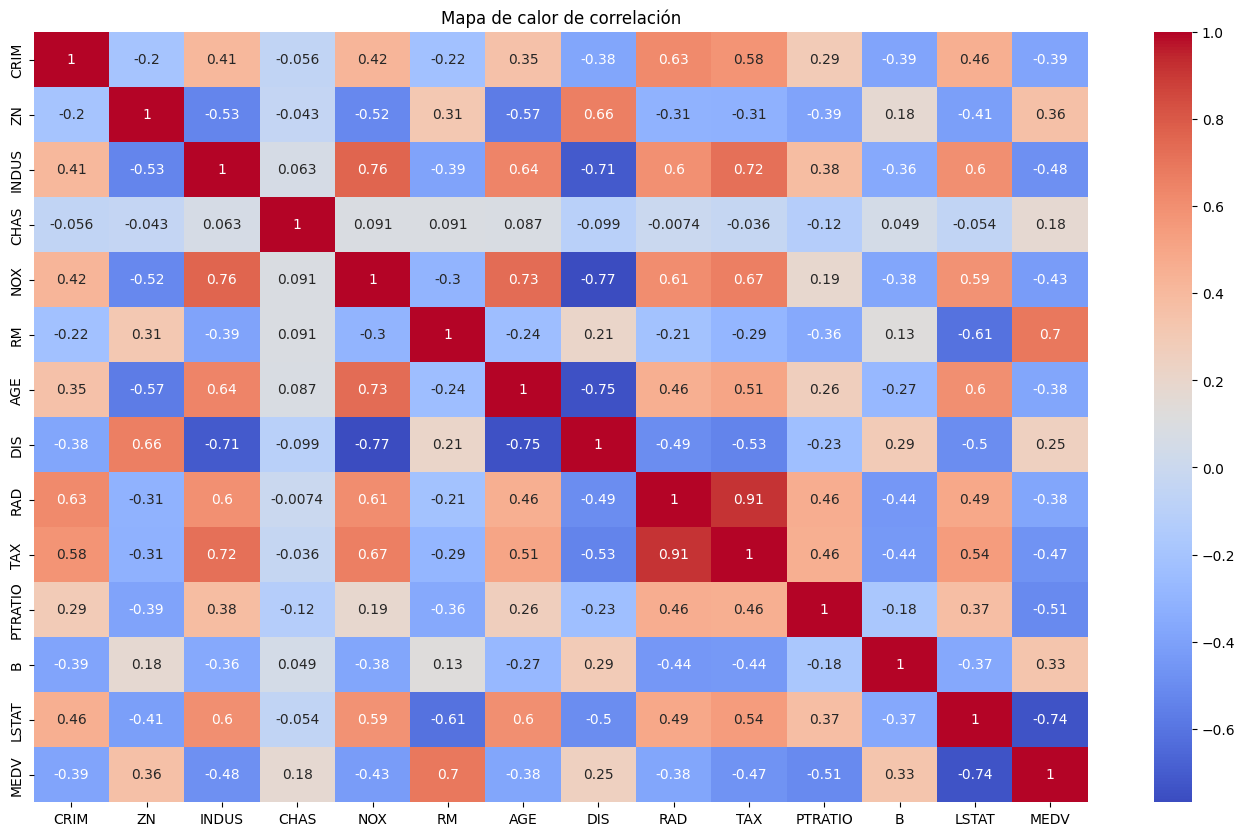

In [3]:
# Importando numpy, seaborn y matplotlib.plyplot
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizar la correlación con un mapa de calor
correlation_matrix = df.corr()
plt.figure(figsize=(17, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Mapa de calor de correlación")
plt.show()

## Escoger variables independientes para la regresión lineal

El mapa de calor nos muestra las correlaciones entre todas las características del conjunto de datos de viviendas de Boston. La variable dependiente que queremos predecir es "**MEDV**" (precio medio de las casas).  

A partir del mapa de calor, podemos observar que las características que tienen una alta correlación (ya sea positiva o negativa) con "MEDV" son:  

* RM: número medio de habitaciones por vivienda (correlación positiva de 0.7)
* LSTAT: porcentaje de la población con un estatus socioeconómico más bajo (correlación negativa de -0.74)
* PTRATIO: relación alumno-profesor por ciudad (correlación negativa de -0.51)

Para el propósito de la regresión lineal múltiple, seleccionaré las características "**RM**" y "**LSTAT**" debido a sus altas correlaciones con "**MEDV**".

## Dividir los datos en entrenamiento y prueba

In [8]:
# Importar train_test_split, LinnearRegession, mean_squared_error y r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Seleccionar características y dividir los datos en entrenamiento y prueba
X = df[['RM', 'LSTAT']]
y = df['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 20% de los datos son para pruebas

## Construcción y evaluación del modelo de regresión lineal múltiple

In [9]:
# Construir el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Evaluando el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(31.243290601783627, 0.5739577415025858)

Tras entrenar y evaluar el modelo de regresión lineal múltiple, aquí están las conclusiones:  

1. **Error Cuadrático Medio (MSE)**: El MSE es de aproximadamente **$31.24$**. Este valor representa la diferencia promedio entre los valores reales y las predicciones del modelo. Cuanto menor sea el MSE, mejor será el modelo.

2. **Coeficiente de Determinación ($R^2$)**: El valor de $R^2$ es de aproximadamente **0.574**. Esto implica que aproximadamente el **57.4%** de la variabilidad en el precio medio de las viviendas (MEDV) puede ser explicado por el modelo utilizando las características **'RM'** y **'LSTAT'**.

El modelo parece tener un rendimiento decente con un $R^2$ de **0.574**, lo que indica que las características seleccionadas, **RM** y **LSTAT**, son relevantes para predecir el precio medio de las viviendas. Sin embargo, hay margen de mejora, y se podría considerar la inclusión de más características o el uso de técnicas de regularización para mejorar el rendimiento del modelo.

## Regularización con la regresión Lasso o L1

* Añade un término de penalización igual a la magnitud absoluta de los coeficientes.
* La fórmula de coste es $J(θ)=MSE(θ)+α \sum_{i=1}^n ∣θ{i}∣$
* Una característica interesante de la regresión Lasso es que tiende a hacer que algunos coeficientes sean exactamente cero, lo que implica una especie de selección automática de características.

In [11]:
# Importando GridSearchCV
from sklearn.model_selection import GridSearchCV

# Importando Lasso
from sklearn.linear_model import Lasso

# Definir el modelo Lasso y la grilla de parámetros
lasso = Lasso()
parameters = {'alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]}

# Usar GridSearchCV para encontrar el mejor valor de alpha
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

# Obtener el mejor parámetro y el MSE asociado
best_alpha = lasso_regressor.best_params_['alpha']
best_mse = -lasso_regressor.best_score_

# Entrenar un modelo Lasso con el mejor parámetro
lasso_best = Lasso(alpha=best_alpha)
lasso_best.fit(X_train, y_train)

# Predicciones con el conjunto de prueba
y_pred_lasso = lasso_best.predict(X_test)

# Evaluación del modelo
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

best_alpha, best_mse, mse_lasso, r2_lasso

(0.1, 31.599202189194965, 30.918139330455823, 0.5783915952779592)

1. **Mejor valor de $α: 0.1$**. Este es el parámetro de regularización que proporciona el menor Error Cuadrático Medio (MSE) durante la validación cruzada.

2. **MSE en validación cruzada**: Aproximadamente **31.60**. Este es el error promedio en el conjunto de validación durante la validación cruzada.

3. **MSE en el conjunto de prueba**: Aproximadamente **30.92**. Esta métrica indica qué tan bien se desempeña el modelo en datos no vistos previamente.

4. **Coeficiente de Determinación $(R^2)$**: Aproximadamente **0.578**. Esto significa que alrededor del **57.8%** de la variabilidad en el precio medio de las viviendas (**MEDV**) puede ser explicado por el modelo usando las características **RM** y **LSTAT** con regularización Lasso.

Comparando con el modelo anterior sin regularización, el MSE en el conjunto de prueba ha disminuido ligeramente (de 31.24 a 30.92), y el valor de $R^2$ ha aumentado ligeramente (de 0.574 a 0.578). Estos cambios indican una mejora marginal en el rendimiento del modelo con la regularización Lasso.

## Ecuación final

In [37]:
# Obtener los coeficientes y el término independiente de la regresión Lasso
coefs = lasso_best.coef_
intercept = lasso_best.intercept_

coefs, intercept

(array([ 5.16600041, -0.6487969 ]), -1.7490702356648349)

$$MEDV=5.166×RM−0.649×LSTAT−1.749$$

Donde:

* El coeficiente para RM es 5.166, lo que indica que por cada aumento unitario en el número medio de habitaciones, se espera que el precio medio de las viviendas aumente en aproximadamente 5.166 unidades.
* El coeficiente para LSTAT es -0.649, lo que indica que por cada aumento unitario en el porcentaje de la población con un estatus socioeconómico más bajo, se espera que el precio medio de las viviendas disminuya en aproximadamente 0.649 unidades.
* El término independiente (o intercepto) es -1.749.

In [38]:
coef_rm = coefs[0]
coef_lstat = coefs[1]

print(coef_rm)
print(coef_lstat)
print(intercept)

5.166000408700597
-0.64879690262818
-1.7490702356648349


## Ejemplos de valores reales vs predichos

In [39]:
# Creamos una función que calcule el precio medio de las viviendas (MEDV) usando la ecuación de regresión lineal proporcionada.
def predict_MEDV(RM, LSTAT):
    MEDV = coef_rm * RM + coef_lstat * LSTAT + intercept
    return MEDV

In [17]:
# Imprimimos el dataframe para tomar valores de las columnas
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [41]:
fila = 3
RM_test = df.loc[fila, 'RM']
LSTAT_test = df.loc[fila, 'LSTAT']
MEDV_real = df.loc[fila, 'MEDV']
predicted_MEDV = predict_MEDV(RM_test, LSTAT_test)
print(f'Valor real MEDV: {MEDV_real:.2f}')
print(f'Valor predicho MEDV: {predicted_MEDV:.2f}')

Valor real MEDV: 33.40
Valor predicho MEDV: 32.50
